# Linear Rregression with Python

data set: mpg.csv

The data contains the following columns:

1. mpg: continuous 
2. cylinders: multi-valued discrete
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance) 

https://archive.ics.uci.edu/ml/datasets/Auto+MPG/

# Take a look to the dataset

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## read the data

In [2]:
automobile_data = pd.read_csv('mpg.csv')
automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
automobile_data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [4]:
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [5]:
automobile_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
325,44.3,4,90.0,48.0,2085,21.7,80,2,vw rabbit c (diesel)
201,18.5,6,250.0,110.0,3645,16.2,76,1,pontiac ventura sj
316,19.1,6,225.0,90.0,3381,18.7,80,1,dodge aspen
130,26.0,4,122.0,80.0,2451,16.5,74,1,ford pinto
184,25.0,4,140.0,92.0,2572,14.9,76,1,capri ii


In [7]:
automobile_data.query('mpg > 23.51')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,3,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,3,datsun pl510
19,26.0,4,97.0,46.0,1835,20.5,70,2,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87.0,2672,17.5,70,2,peugeot 504
21,24.0,4,107.0,90.0,2430,14.5,70,2,audi 100 ls
22,25.0,4,104.0,95.0,2375,17.5,70,2,saab 99e
23,26.0,4,121.0,113.0,2234,12.5,70,2,bmw 2002
29,27.0,4,97.0,88.0,2130,14.5,71,3,datsun pl510
30,28.0,4,140.0,90.0,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95.0,2228,14.0,71,3,toyota corona


In [8]:
pd.isnull(automobile_data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [9]:
mean = np.mean(automobile_data.horsepower)
automobile_data.horsepower = automobile_data.horsepower.fillna(mean)

In [10]:
automobile_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

# Let's check the relationships by plotting

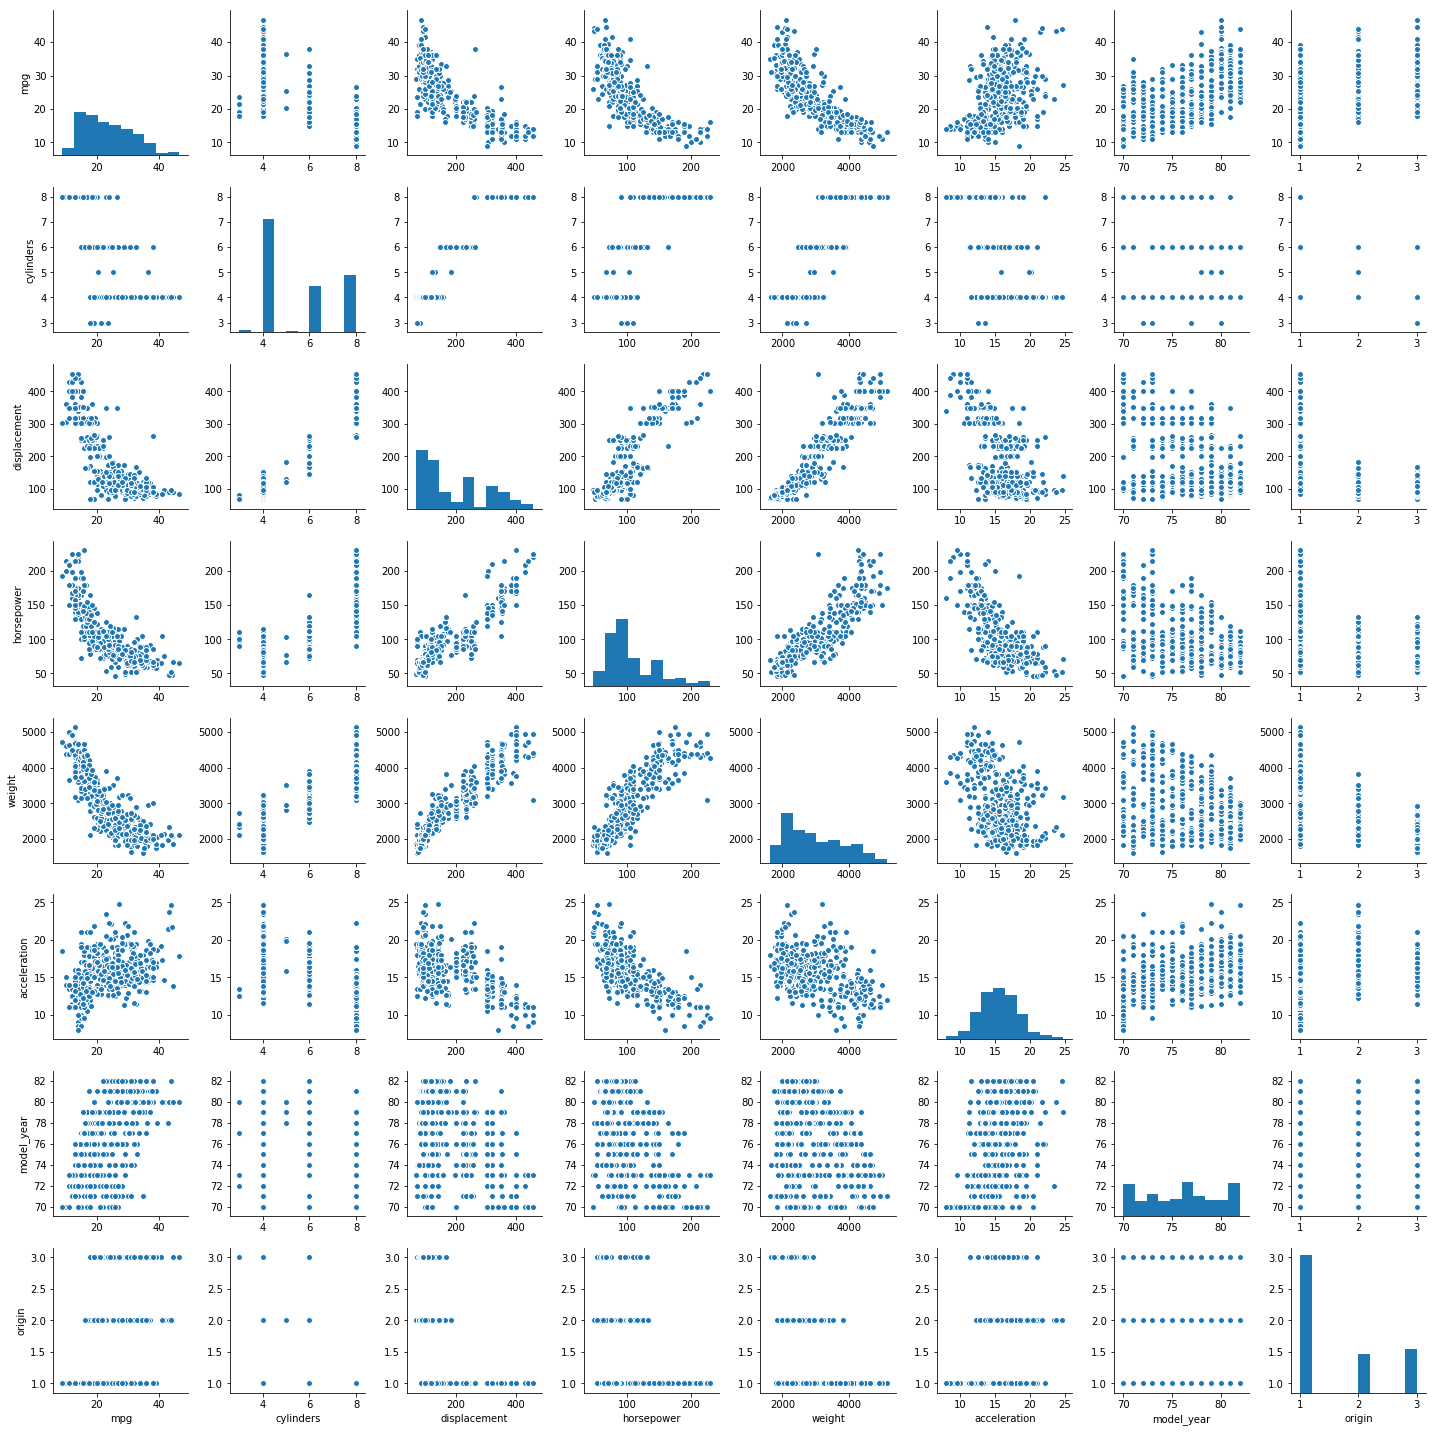

In [11]:
sns.pairplot(automobile_data)

Because we are interested in mpg, we focuse plots associated with mpg variable first, and infer that:
- mpg has negative linear relationship with displacement.
- mpg has negstive linear relationship with weight.
- mpg has positive linear relationship with acceleration. 

Other variables, such like discrete variables, we will discuss it later.

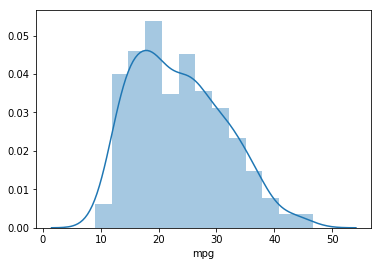

In [12]:
sns.distplot(automobile_data['mpg'])

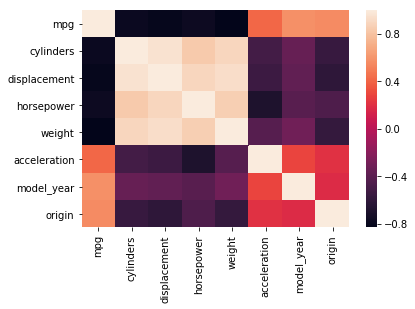

In [13]:
sns.heatmap(automobile_data.corr())

We can see that there is a high positive correlation in 
- [weight, cylinders]
- [weight, displacement]
- [weight, horsepower]
- [horsepower, cylinders]
- horsepower, displacement]
- [displacement, cylinders].

# Training a Linear Regression Model

## model1

## X and y arrays

In [14]:
X = automobile_data[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]
y = automobile_data['mpg']

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluation

In [21]:
print(lm.intercept_)

-15.9080699502


When all the variable being 0, then mpg will be -15, it does not make sense, because it is impossible to have negative mile.

In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.177297
displacement,0.012140
horsepower,-0.015223
weight,-0.006768
acceleration,0.181357
model_year,0.747056


- Holding all other features fixed, a number of 1 increase in cylinder is associated with a decrease of 0.1772 miles per gallon.
- Holding all other features fixed, a 1 increase in engine displacement in cubic inches is associated with an increase of 0.0121 miles per gallon.
- Holding all other features fixed, a 1 unit increase in horsepower is associated with a decrease of 0.0152 miles per gallon .
- Holding all other features fixed, a 1 vehicle weight in pounds is associated with decrease of 0.0067 miles per gallon.
- Holding all other features fixed, a 1 unit of acceleration is associated with increase of 0.1813 miles per gallon.
- Holding all other features fixed, a 1 unit of model_year is associated with increase of 0.7470 miles per gallon.

## Predictions from our Model

In [23]:
predictions = lm.predict(X_test)

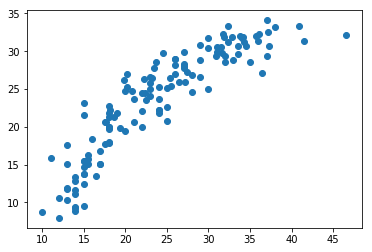

In [24]:
plt.scatter(y_test,predictions)

It seems like there is a diminishing increase.

Residual Histogram

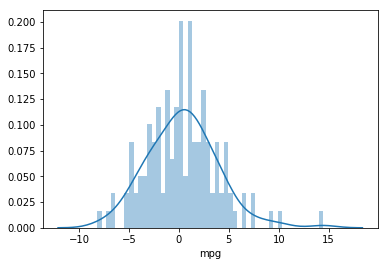

In [25]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics

In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.71792396116
MSE: 12.6697149362
RMSE: 3.55945430315


## model2

# X and y arrays

In [28]:
X = automobile_data[['cylinders', 'displacement', 'horsepower', 'weight']]
y = automobile_data['mpg']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluation

In [31]:
print(lm.intercept_)

46.3265654198


In [32]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.304143
displacement,0.007268
horsepower,-0.068669
weight,-0.005208


- Holding all other features fixed, a number of 1 increase in cylinder is associated with a decrease of 0.3041 miles per gallon.
- Holding all other features fixed, a 1 increase in engine displacement in cubic inches is associated with an increase of 0.007268 miles per gallon.
- Holding all other features fixed, a 1 unit increase in horsepower is associated with a decrease of 0.068669 miles per gallon .
- Holding all other features fixed, a 1 vehicle weight in pounds is associated with decrease of 0.005208 miles per gallon.

## Predictions from our Model

In [33]:
predictions = lm.predict(X_test)

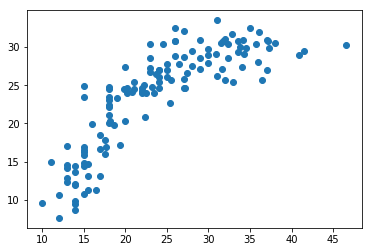

In [34]:
plt.scatter(y_test,predictions)

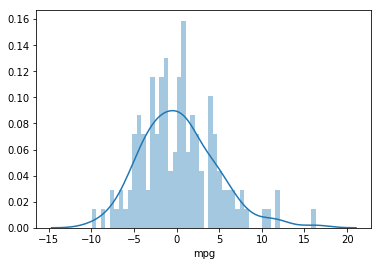

In [35]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.42909322277
MSE: 19.4806942333
RMSE: 4.41369394423


Together these variables are influencing mileage but we can’t sort out the influence of each one of them, dropping one of the variables is not a solution too, because given high correlation, it will introduce omitted-variable bias. After we drop variable 'displacement', 'acceleration', and 'model_year', coefficient does not change a lot because of the collinearity. However, if we remove other variables, error term absolute value will become larger. In conclusion, we still have include other variables in the model.
